In [ ]:
!pip install deeplake


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 79.5 MB/s eta 0:00:00


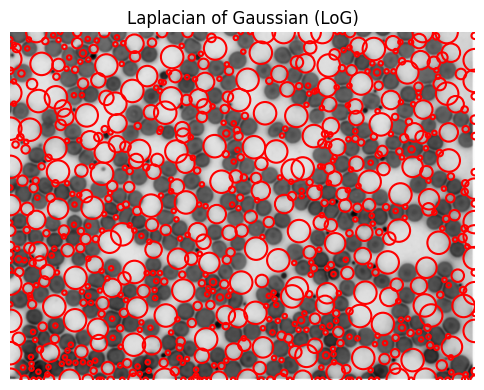

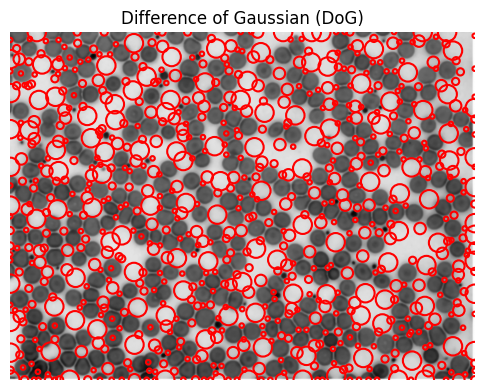

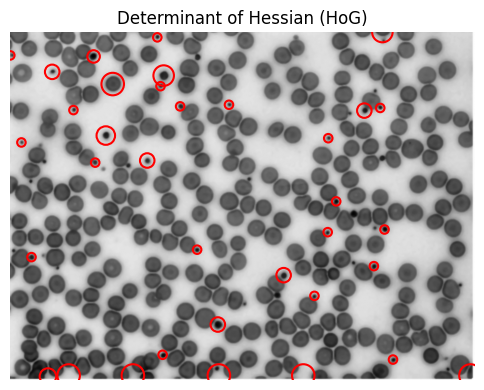

In [21]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.filters import median
from skimage.morphology import disk


image_path = 'blob.jpg'
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


gray_filtered = median(gray, disk(3))


clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
enhanced_gray = clahe.apply(gray_filtered)


smoothed_gray = cv2.GaussianBlur(enhanced_gray, (3,3), 0)


blobs_log = blob_log(smoothed_gray, min_sigma=3, max_sigma=15, num_sigma=10, threshold=0.02)
blobs_dog = blob_dog(smoothed_gray, min_sigma=3, max_sigma=15, threshold=0.02)
blobs_doh = blob_doh(smoothed_gray, min_sigma=3, max_sigma=15, threshold=0.01)


blobs_log[:, 2] = blobs_log[:, 2] * np.sqrt(2)
blobs_dog[:, 2] = blobs_dog[:, 2] * np.sqrt(2)
blobs_doh[:, 2] = blobs_doh[:, 2] * np.sqrt(2)


def plot_blobs(image, blobs, title):
    fig, ax = plt.subplots(figsize=(6,6))
    ax.imshow(image, cmap='gray')
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color='red', linewidth=1.5, fill=False)
        ax.add_patch(c)
    ax.set_title(title)
    ax.axis('off')
    plt.show()


plot_blobs(smoothed_gray, blobs_log, 'Laplacian of Gaussian (LoG)')
plot_blobs(smoothed_gray, blobs_dog, 'Difference of Gaussian (DoG)')
plot_blobs(smoothed_gray, blobs_doh, 'Determinant of Hessian (HoG)')


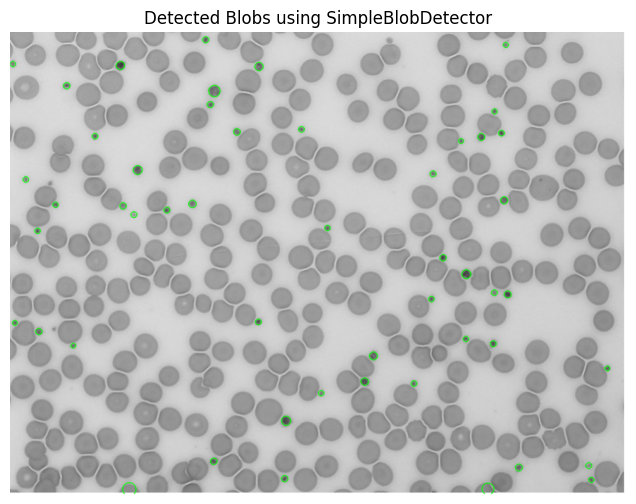

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image_path = "/content/blob.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)


params = cv2.SimpleBlobDetector_Params()


params.filterByArea = True
params.minArea = 30
params.maxArea = 300


params.filterByCircularity = True
params.minCircularity = 0.2


params.filterByConvexity = True
params.minConvexity = 0.7


params.filterByInertia = True
params.minInertiaRatio = 0.2


detector = cv2.SimpleBlobDetector_create(params)


keypoints = detector.detect(image)


image_with_blobs = cv2.drawKeypoints(
    image, keypoints, np.array([]), (0, 255, 0),
    cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)


plt.figure(figsize=(10, 6))
plt.imshow(image_with_blobs, cmap='gray')
plt.title("Detected Blobs using SimpleBlobDetector")
plt.axis("off")
plt.show()


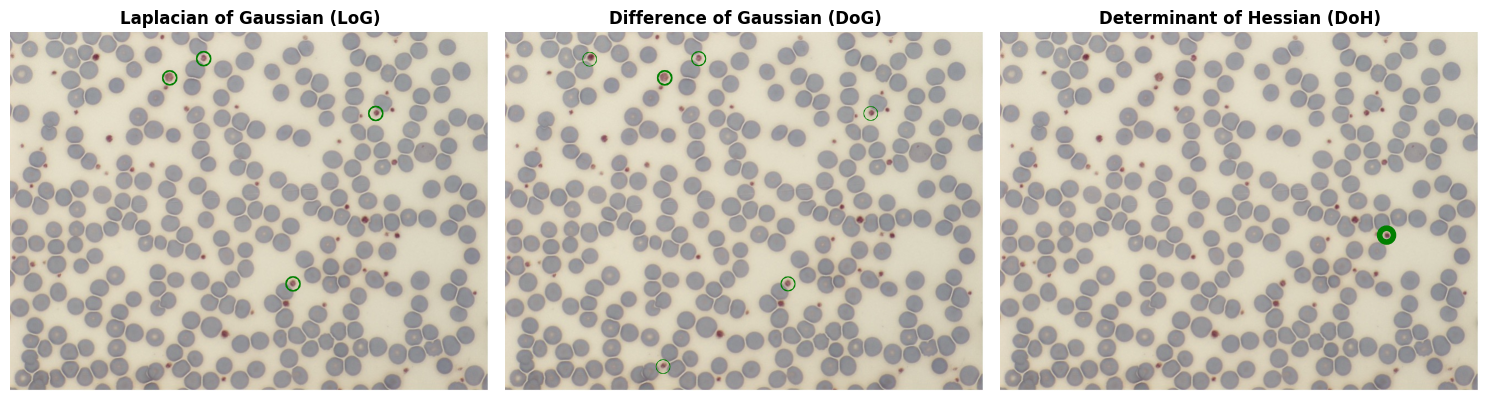

In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import blob_log, blob_dog, blob_doh
from skimage import img_as_float

# Load the image in color
image_path = "/content/blob.jpg"
image_color = cv2.imread(image_path)
image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)
image_float = img_as_float(image_gray)

# Convert image to HSV for color filtering
image_hsv = cv2.cvtColor(image_color, cv2.COLOR_BGR2HSV)

# Define HSV range for purple platelets (fine-tune as needed)
lower_purple = np.array([120, 50, 50])
upper_purple = np.array([160, 255, 255])

# Create a mask for purple regions
mask_purple = cv2.inRange(image_hsv, lower_purple, upper_purple)

# Apply LoG (Laplacian of Gaussian)
blobs_log = blob_log(image_float, min_sigma=1, max_sigma=4, num_sigma=3, threshold=0.02, overlap=0.1)
blobs_log[:, 2] = blobs_log[:, 2] * np.sqrt(2)  # Convert std deviation to radius

# Apply DoG (Difference of Gaussian)
blobs_dog = blob_dog(image_float, min_sigma=0.01, max_sigma=5, sigma_ratio=1.6, threshold=0.02, overlap=0.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * np.sqrt(2)

# Apply DoH (Determinant of Hessian)
blobs_doh = blob_doh(image_float, min_sigma=0.01, max_sigma=5, num_sigma=3, threshold=0.01, overlap=0.1)


def filter_blobs(blobs):
    return np.array([blob for blob in blobs if mask_purple[int(blob[0]), int(blob[1])] > 0])


filtered_log = filter_blobs(blobs_log)
filtered_dog = filter_blobs(blobs_dog)
filtered_doh = filter_blobs(blobs_doh)


fig, axes = plt.subplots(1, 3, figsize=(15, 5))
titles = ["Laplacian of Gaussian (LoG)", "Difference of Gaussian (DoG)", "Determinant of Hessian (DoH)"]
blobs_list = [filtered_log, filtered_dog, filtered_doh]

for ax, title, blobs in zip(axes, titles, blobs_list):
    ax.imshow(image_color, cmap='gray')
    for y, x, r in blobs:
        ax.add_patch(plt.Circle((x, y), r, color='green', linewidth=10, fill=False))
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.axis("off")

plt.tight_layout()
plt.show()

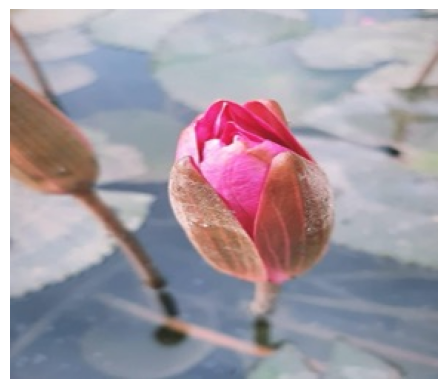

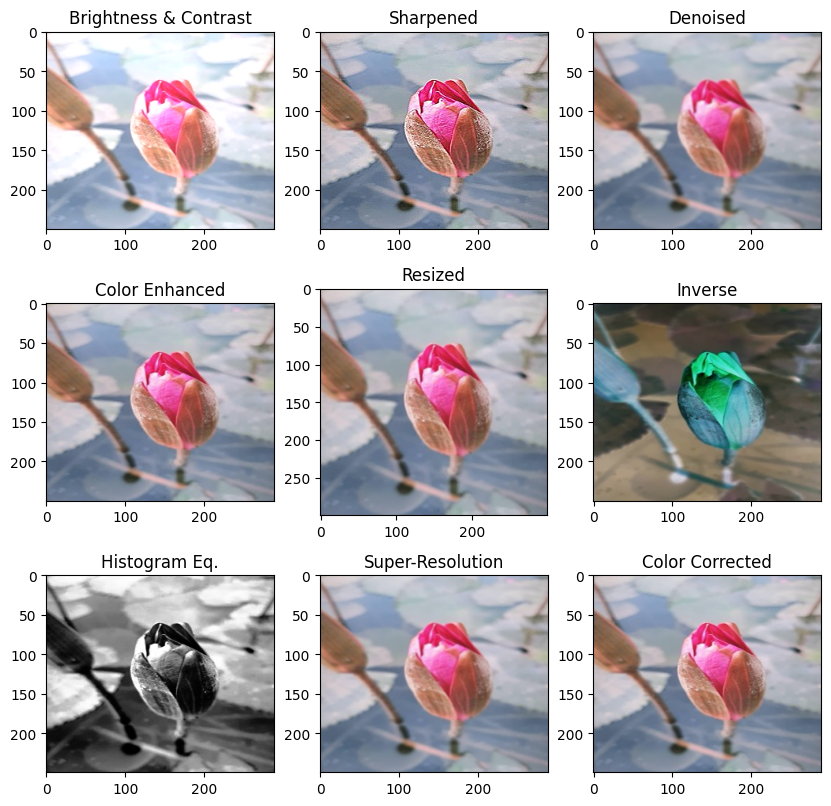

In [ ]:
import cv2
import numpy as np
from skimage.exposure import equalize_hist
import matplotlib.pyplot as plt

filepath = "/content/lotus.jpg"

image = cv2.imread(filepath)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis("off")
plt.show()


def load_image(filepath):
    with open(filepath, 'rb') as f:
        img = cv2.imdecode(np.frombuffer(f.read(), np.uint8), cv2.IMREAD_COLOR)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Image Enhancement Functions
def adjust_brightness_contrast(image, alpha=1.2, beta=20):
    return cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

def sharpen_image(image):
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    return cv2.filter2D(image, -1, kernel)

def remove_noise(image):
    return cv2.GaussianBlur(image, (5, 5), 0)

def enhance_color(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

def resize_image(image, width, height):
    return cv2.resize(image, (width, height))

def inverse_transform(image):
    return 255 - image

def histogram_equalization(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    return equalize_hist(gray)

def super_resolution(image):
    upscaled = cv2.pyrUp(image)
    return cv2.pyrDown(upscaled)

def color_correction(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    lower = np.array([0, 0, 0])
    upper = np.array([255, 255, 255])
    mask = cv2.inRange(hsv, lower, upper)
    return cv2.bitwise_and(image, image, mask=mask)

if __name__ == "__main__":
    img_path = "lotus.jpg"
    image = load_image(img_path)

    bright_contrast = adjust_brightness_contrast(image)
    sharpened = sharpen_image(image)
    noise_removed = remove_noise(image)
    color_enhanced = enhance_color(image)
    resized = resize_image(image, 300, 300)
    inverse = inverse_transform(image)
    hist_eq = histogram_equalization(image)
    super_res = super_resolution(image)
    color_corrected = color_correction(image)

    # Results
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 10))
    plt.subplot(3, 3, 1), plt.imshow(bright_contrast), plt.title('Brightness & Contrast')
    plt.subplot(3, 3, 2), plt.imshow(sharpened), plt.title('Sharpened')
    plt.subplot(3, 3, 3), plt.imshow(noise_removed), plt.title('Denoised')
    plt.subplot(3, 3, 4), plt.imshow(color_enhanced), plt.title('Color Enhanced')
    plt.subplot(3, 3, 5), plt.imshow(resized), plt.title('Resized')
    plt.subplot(3, 3, 6), plt.imshow(inverse, cmap='gray'), plt.title('Inverse')
    plt.subplot(3, 3, 7), plt.imshow(hist_eq, cmap='gray'), plt.title('Histogram Eq.')
    plt.subplot(3, 3, 8), plt.imshow(super_res), plt.title('Super-Resolution')
    plt.subplot(3, 3, 9), plt.imshow(color_corrected), plt.title('Color Corrected')
    plt.show()



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import time
from torchvision.models import vgg16, alexnet
from torch.utils.data import DataLoader


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Step 2: CIFAR-100 dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=4)

# Step 3: Pretrained Models
def get_model(model_name):
    if model_name == "alexnet":
        model = alexnet(pretrained=True)
        model.classifier[6] = nn.Linear(4096, 100)
    elif model_name == "vgg16":
        model = vgg16(pretrained=True)
        model.classifier[6] = nn.Linear(4096, 100)
    model = model.to(device)
    return model

# Training Function
def train_model(model, train_loader, criterion, optimizer, epochs=5):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}")

# Evaluation Function
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    start_time = time.time()
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    end_time = time.time()
    accuracy = 100 * correct / total
    print(f"Accuracy: {accuracy:.2f}%, Inference Time: {end_time - start_time:.2f}s")
    return accuracy, end_time - start_time

# Train and Evaluate AlexNet
alexnet_model = get_model("alexnet")
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(alexnet_model.parameters(), lr=0.001)
train_model(alexnet_model, train_loader, criterion, optimizer, epochs=5)
alexnet_acc, alexnet_time = evaluate_model(alexnet_model, test_loader)

# Train and Evaluate VGG16
vgg16_model = get_model("vgg16")
optimizer = optim.Adam(vgg16_model.parameters(), lr=0.001)
train_model(vgg16_model, train_loader, criterion, optimizer, epochs=5)
vgg16_acc, vgg16_time = evaluate_model(vgg16_model, test_loader)

# Compare Results
print(f"AlexNet - Accuracy: {alexnet_acc:.2f}%, Time: {alexnet_time:.2f}s")
print(f"VGG16 - Accuracy: {vgg16_acc:.2f}%, Time: {vgg16_time:.2f}s")

Epoch 1, Loss: 4.6079
Epoch 2, Loss: 4.6066
Epoch 3, Loss: 4.6064
Epoch 4, Loss: 4.6062
Epoch 5, Loss: 4.6061
Accuracy: 1.00%, Inference Time: 18.07s
Epoch 1, Loss: 4.2898
Epoch 2, Loss: 3.7029
Epoch 3, Loss: 3.3686
Epoch 4, Loss: 3.1071
Epoch 5, Loss: 2.8620
Accuracy: 28.80%, Inference Time: 53.36s
AlexNet - Accuracy: 1.00%, Time: 18.07s
VGG16 - Accuracy: 28.80%, Time: 53.36s
